In [10]:
#ZOMATO DATA ANALYSIS PROJECT

## step 1: Importing Libraries

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
## step 2 : create the dataframe

dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [12]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [13]:
## convert the datatype of column(rate)

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value) 

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [14]:
##check for any missing value or null value

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [15]:
## Type of restaurant
##

dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

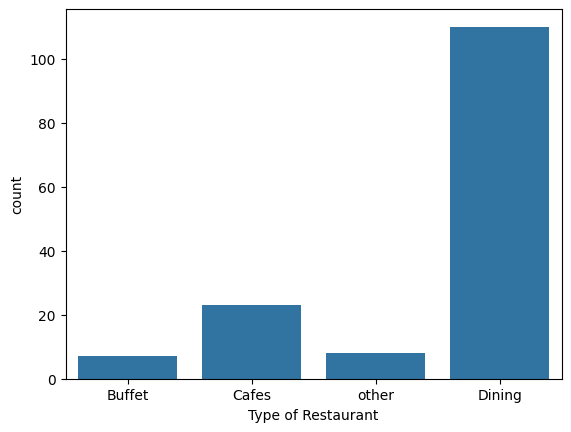

In [21]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

In [ ]:
## Conclusion - Majority of the restaurant falls in dinning category

Text(0, 0.5, 'Votes')

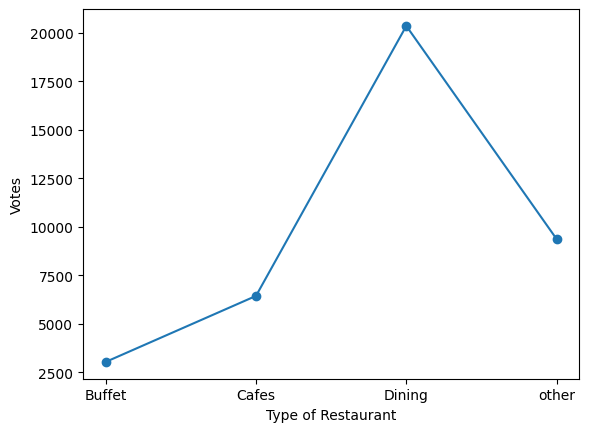

In [13]:
##

grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result,marker="o")
plt.xlabel("Type of Restaurant")
plt.ylabel("Votes")

In [ ]:
## conclusion - Dinning restaurant has recieved maximum votes

<function matplotlib.pyplot.show(close=None, block=None)>

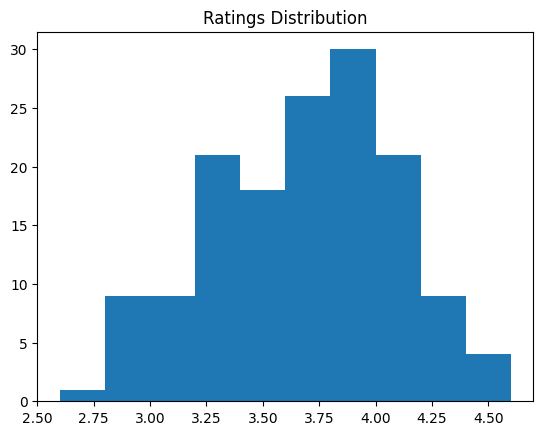

In [15]:
##

plt.hist(dataframe['rate'], bins = 10)
plt.title("Ratings Distribution")
plt.show

In [ ]:
## Conclusion - The majority restaurants received rating from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

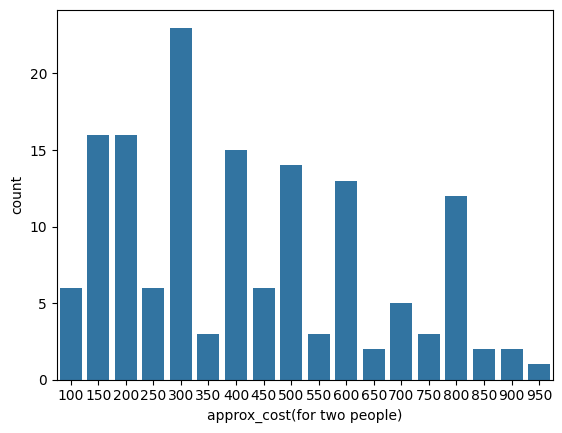

In [16]:
##


couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

In [ ]:
## conclusion - The majority of couple prefer resturent with am approx cost of Rs.300

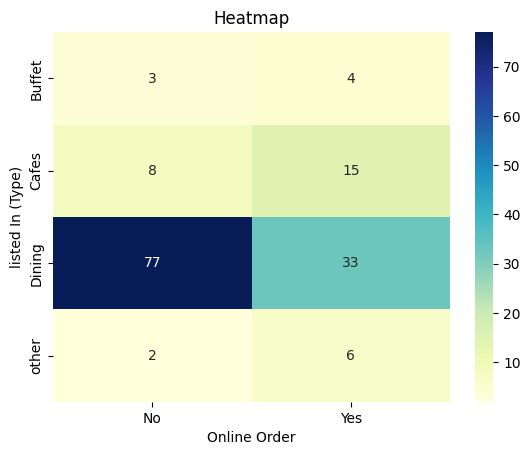

In [20]:
##


pivot_table = dataframe.pivot_table(index="listed_in(type)", columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot = True , cmap = "YlGnBu", fmt= 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("listed In (Type)")
plt.show()

In [ ]:
##conclusion - Dinning restaurant primarily accept offline order, whereas cafes primarily receive online order. 

T-Statistic: 6.011
P-Value: 0.0
✅ Significant difference in ratings between online and offline order restaurants.


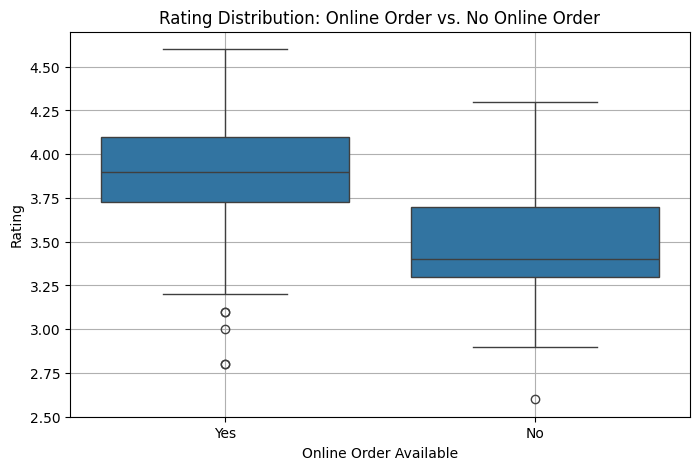

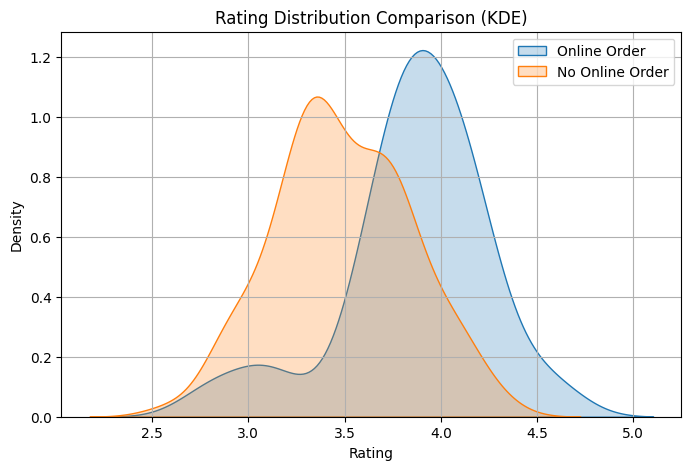

In [7]:
# Filter and clean data
group_a = dataframe[dataframe['online_order'] == 'Yes']['rate'].dropna()
group_b = dataframe[dataframe['online_order'] == 'No']['rate'].dropna()

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False)

print("T-Statistic:", round(t_stat, 3))
print("P-Value:", round(p_val, 4))

if p_val < 0.05:
    print("✅ Significant difference in ratings between online and offline order restaurants.")
else:
    print("❌ No significant difference in ratings.")


# 📊 Visualization 1: Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title('Rating Distribution: Online Order vs. No Online Order')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


# 📊 Visualization 2: KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(group_a, label='Online Order', fill=True)
sns.kdeplot(group_b, label='No Online Order', fill=True)
plt.title('Rating Distribution Comparison (KDE)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Since the p-value is less than 0.05, we reject the null hypothesis.

#✅ This means there is a statistically significant difference in ratings between restaurants that offer online ordering and those that don’t.

"""1. Boxplot
Restaurants with online ordering have higher median ratings.

Fewer outliers and tighter rating spread for online-order restaurants.

Offline restaurants have lower and more varied ratings.

2. KDE Plot (Density Plot)
The blue curve (online order) peaks around 4.0–4.2, indicating better customer satisfaction.

The orange curve (offline only) peaks around 3.4–3.6, showing lower ratings overall.

Clear separation between the two curves confirms the t-test result.
"""
"""
Business Insights / Recommendations
For Zomato:
Encourage more partner restaurants to adopt online ordering — it correlates with better customer experience and likely higher repeat orders.

For Restaurants (Partners):
If you're not offering online ordering yet, you may be missing out on both higher visibility and higher ratings.

For Marketing Teams:
Consider promoting restaurants with online ordering as "top-rated picks", leveraging the observed customer satisfaction boost.
"""

Correlation Coefficient: 0.275
P-Value: 0.0007


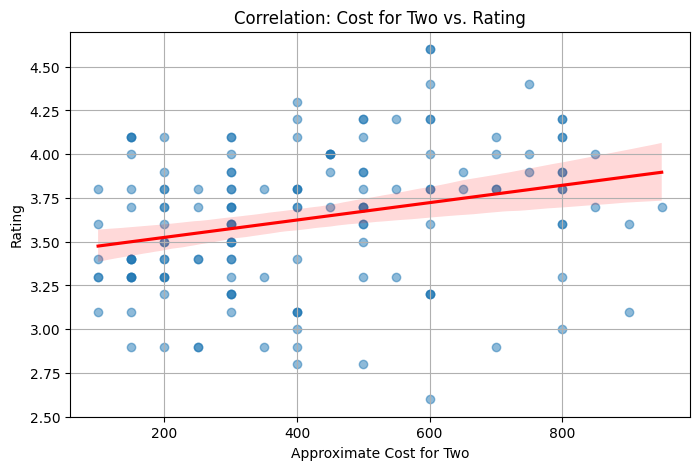

In [16]:
# Clean the data
df_corr = dataframe[['rate', 'approx_cost(for two people)']].dropna()

# Convert cost column to numeric if needed (remove commas or strings)
df_corr['approx_cost(for two people)'] = df_corr['approx_cost(for two people)'].replace(',', '', regex=True).astype(float)

# Pearson correlation
corr, p_value = pearsonr(df_corr['rate'], df_corr['approx_cost(for two people)'])

print("Correlation Coefficient:", round(corr, 3))
print("P-Value:", round(p_value, 4))

# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='approx_cost(for two people)', y='rate', data=df_corr, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Correlation: Cost for Two vs. Rating')
plt.xlabel('Approximate Cost for Two')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [ ]:
'''Interpretation of the Output
A correlation coefficient of 0.275 indicates a weak positive correlation between cost and rating.

Since the p-value is less than 0.05, the correlation is statistically significant.

✅ This means that as the cost of dining increases, there is a slight but statistically significant increase in the restaurant's customer rating.

📉 Interpretation of the Visualization (Scatter Plot + Regression Line)
The scatter plot shows individual data points (each dot = one restaurant).

The red regression line slopes gently upward, confirming a positive trend.

The spread of points around the line shows that the relationship exists but is not very strong — it’s noisy.

💼 Business Conclusion
Customers tend to rate slightly more expensive restaurants higher, but the relationship is weak.

💡 Business Insights / Recommendations
For Zomato:

Price may contribute to perceived quality, but it's not the sole driver of good ratings.

Ratings are likely influenced by service quality, food, ambiance, etc., not just price.

For Restaurants:

Slightly premium pricing may not hurt your ratings — especially if you deliver good experience.

However, pricing alone won't guarantee better reviews.

For Data Teams:

Consider combining cost with other factors (e.g., delivery time, cuisine, ambiance) in a multi-variable model to predict ratings more accurately.
'''